# Quickstart  Example of Pysensemakr Package

In [1]:
# Imports
from sensemakr import sensitivity_stats
from sensemakr import bias_functions
from sensemakr import ovb_bounds
from sensemakr import ovb_plots
from sensemakr import data
from sensemakr import sensemakr
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np
import pandas as pd

In [2]:
# loads data
darfur = data.load_darfur()
darfur.head()

,wouldvote,peacefactor,peace_formerenemies,peace_jjindiv,peace_jjtribes,gos_soldier_execute,directlyharmed,age,farmer_dar,herder_dar,pastvoted,hhsize_darfur,village,female
0,0,1.000000,1,1,1,0,0,30,0,0,1,23,Abdel Khair,0
1,0,0.706831,0,1,1,0,0,20,1,0,1,5,Abdi Dar,1
2,1,0.000000,0,0,0,1,0,45,1,0,0,15,Abu Sorog,0
3,1,0.495178,1,0,0,0,1,55,0,0,0,9,Abu Dejaj,0
4,0,0.000000,0,0,0,1,1,25,1,0,1,7,Abu Dejaj,1


In [3]:
# runs regression model
reg_model = smf.ols(formula='peacefactor ~ directlyharmed + age + farmer_dar + herder_dar + '\
                    'pastvoted + hhsize_darfur + female + village', data=darfur)
model = reg_model.fit()

In [4]:
# Define parameters for sensemakr
treatment = "directlyharmed"
q = 1.0
alpha = 0.05
reduce = True
benchmark_covariates=["female"]
kd = [1, 2, 3]
ky = kd

In [5]:
# Create a sensemakr object and print summary of results
s = sensemakr.Sensemakr(model, treatment, q=q, 
                        alpha=alpha, reduce=reduce, benchmark_covariates=benchmark_covariates, kd=kd)
s.summary()

Sensitivity Analysis to Unobserved Confounding

Model Formula: peacefactor ~ directlyharmed + age + farmer_dar + herder_dar + pastvoted + hhsize_darfur + female + village

Null hypothesis: q = 1.0 and reduce = True 

-- This means we are considering biases that reduce the absolute value of the current estimate.
-- The null hypothesis deemed problematic is H0:tau = 0.0 

Unadjusted Estimates of ' directlyharmed ':
  Coef. estimate: 0.097
  Standard Error: 0.023
  t-value: 4.184 

Sensitivity Statistics:
  Partial R2 of treatment with outcome: 0.022
  Robustness Value, q = 1.0 : 0.139
  Robustness Value, q = 1.0 alpha = 0.05 : 0.076 

Verbal interpretation of sensitivity statistics:

-- Partial R2 of the treatment with the outcome: an extreme confounder (orthogonal to the covariates)  that explains 100% of the residual variance of the outcome, would need to explain at least 2.187 % of the residual variance of the treatment to fully account for the observed estimated effect.

-- Robustnes

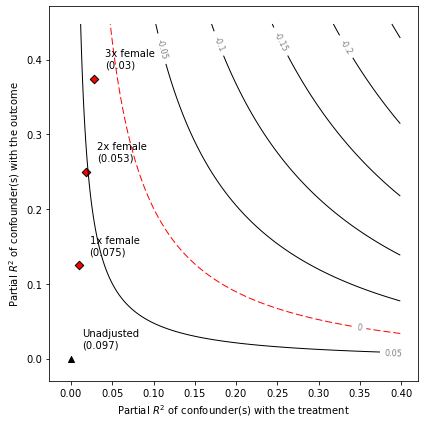

In [6]:
# Make a contour plot for the estimate
ovb_plots.ovb_contour_plot(sense_obj=s, sensitivity_of='estimate')

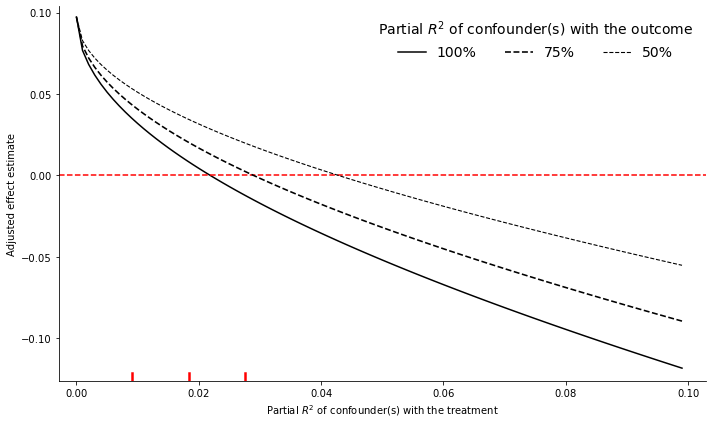

In [7]:
ovb_plots.ovb_extreme_plot(sense_obj=s)